In [325]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')


In [326]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [327]:
# Data Loading
data_path = '/content/drive/MyDrive/V5/CKD_India.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

print('Dataset loaded successfully.')
print('Shape:', df.shape)

Dataset loaded successfully.
Shape: (1100, 26)


In [328]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [329]:
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].unique()[:20])  # show first 10 unique values


rbc [nan 'normal' 'abnormal']
pc ['normal' nan 'abnormal']
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
pcv ['52' '44' '41' '17' '28' '38' '24' '46' '\t43' '42' '32' '53' '30' '22'
 '48' '50' '26' '35' '29' '33']
wc ['7000' '7300' '7200' '6500' '14600' nan '9200' '4900' '5800' '10500'
 '10400' '6000' '16300' '6900' '9100' '5500' '4700' '8000' '4500' '9400']
rc [nan '6.4' '5.0' '3.2' '5.2' '5' '5.5' '4.2' '4.5' '2.7' '4.9' '5.8' '5.7'
 '5.4' '5.1' '3.4' '2.4' '4.8' '3.6' '4.7']
htn ['no' 'yes' nan]
dm ['no' 'yes' '\tno' '\tyes' nan ' yes']
cad ['no' 'yes' '\tno' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
classification ['ckd' 'notckd' 'ckd\t']


In [330]:
new_df = df.copy()

In [331]:
new_df.columns = [
    'id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
    'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class'
]

In [332]:
# new labling
new_df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


# **Pre Processing**

## **1.Drop unecasasry columns**

In [333]:
#before
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [334]:
new_df = new_df.drop('id', axis=1)
print('Column id dropped successfully.')
print('Shape after dropping id:', new_df.shape)
new_df.head()

Column id dropped successfully.
Shape after dropping id: (1100, 25)


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd
1,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [335]:
# backup of this table to do before or after comparisons on data cleaning
new_df_bef = new_df.copy()

## 2. This step had to be moved down before step number 6 because values needed to be converted into numbers before outlier detection

## **3. Missing Value replace with mean and mode**





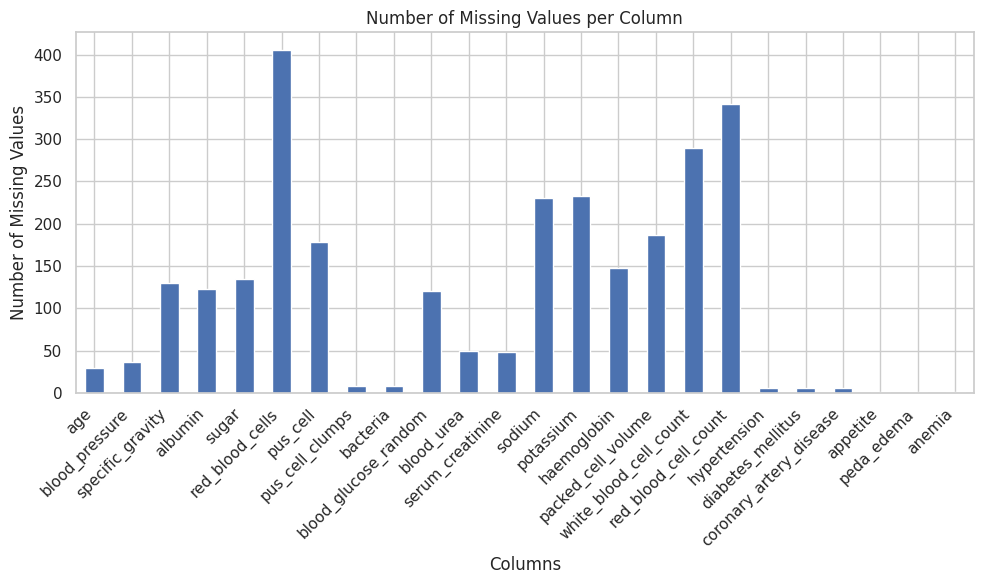

In [336]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

In [337]:
# Identify numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
categorical_cols = new_df.select_dtypes(include='object').columns

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

print("Missing values filled successfully.")

Missing values filled successfully.


In [338]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


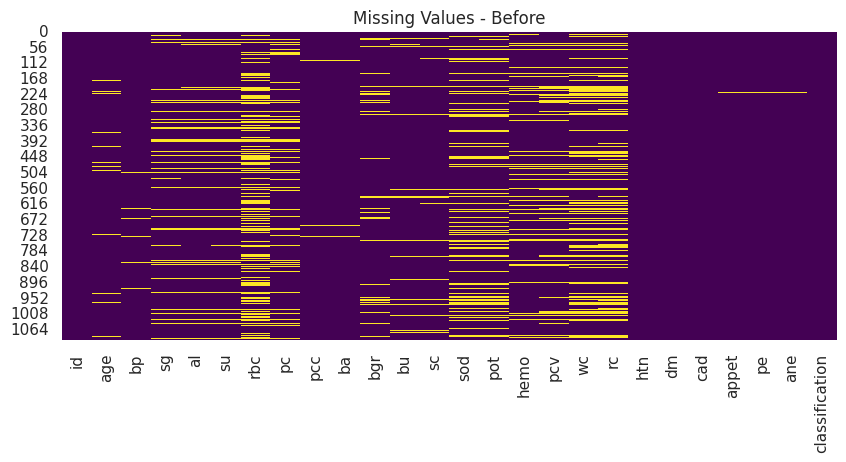

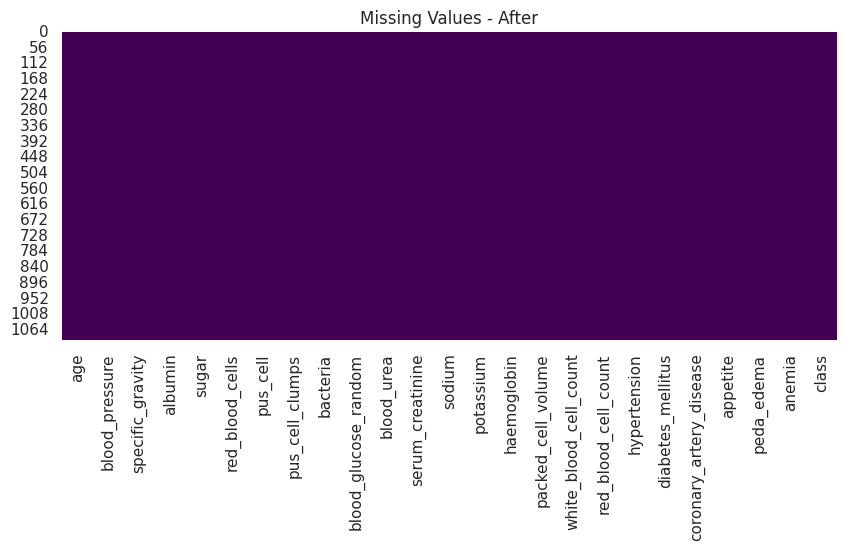

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before")
plt.show()

# After
plt.figure(figsize=(10,4))
sns.heatmap(new_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After")
plt.show()


In [340]:
print("Missing values per column after filling:")
print(new_df.isnull().sum())

Missing values per column after filling:
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64


In [341]:
# Misc Missed pre processing stuff

# Columns identified as having non-numeric issues
cols_to_clean_numeric = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

print("Checking and handling non-numeric values in specified columns:")

for col in cols_to_clean_numeric:
    # Identify non-numeric values before conversion
    non_numeric_values = new_df[col][pd.to_numeric(new_df[col], errors='coerce').isna()].unique()
    if len(non_numeric_values) > 0:
        print(f"Column '{col}' contains non-numeric values: {non_numeric_values}")

    # Convert to numeric, coercing errors to NaN
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

    # Fill the newly created NaNs with the mean of the column
    mean_value = new_df[col].mean()
    new_df[col] = new_df[col].fillna(mean_value)
    print(f"Filled missing values in '{col}' with mean: {mean_value:.2f}")


print("\nNon-numeric values in specified columns have been handled.")

# Verify that these columns are now numeric and have no missing values
for col in cols_to_clean_numeric:
    print(f"Column '{col}' data type: {new_df[col].dtype}, Missing values: {new_df[col].isnull().sum()}")

Checking and handling non-numeric values in specified columns:
Column 'packed_cell_volume' contains non-numeric values: ['\t?']
Filled missing values in 'packed_cell_volume' with mean: 39.07
Column 'white_blood_cell_count' contains non-numeric values: ['\t?']
Filled missing values in 'white_blood_cell_count' with mean: 7933.00
Column 'red_blood_cell_count' contains non-numeric values: ['\t?']
Filled missing values in 'red_blood_cell_count' with mean: 4.82

Non-numeric values in specified columns have been handled.
Column 'packed_cell_volume' data type: float64, Missing values: 0
Column 'white_blood_cell_count' data type: float64, Missing values: 0
Column 'red_blood_cell_count' data type: float64, Missing values: 0


## 4. Fix Typos (errors in data entering)

In [342]:
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :{new_df['coronary_artery_disease'].unique()}")
print(f"class : {new_df['class'].unique()}")

#typos before

diabetes_mellitus : ['no' 'yes' '\tno' '\tyes' ' yes']
coronary_artery_disease :['no' 'yes' '\tno']
class : ['ckd' 'notckd' 'ckd\t']


In [343]:
for col in new_df.select_dtypes(include=['object']).columns:
    print(col, new_df[col].unique()[:20])  # show first 10 unique values


red_blood_cells ['normal' 'abnormal']
pus_cell ['normal' 'abnormal']
pus_cell_clumps ['notpresent' 'present']
bacteria ['notpresent' 'present']
hypertension ['no' 'yes']
diabetes_mellitus ['no' 'yes' '\tno' '\tyes' ' yes']
coronary_artery_disease ['no' 'yes' '\tno']
appetite ['good' 'poor']
peda_edema ['no' 'yes']
anemia ['no' 'yes']
class ['ckd' 'notckd' 'ckd\t']


In [344]:
# lable typing mistakes into correct yes or no
new_df['diabetes_mellitus'] = new_df['diabetes_mellitus'].replace(to_replace={" yes":"yes","\tyes":"yes","\tno":"no"})
new_df['coronary_artery_disease'] = new_df['coronary_artery_disease'].replace(to_replace={"\tno":"no"})
new_df['class'] = new_df['class'].replace(to_replace={"ckd\t":"ckd","notckd":"not ckd"})

In [345]:
#after
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :{new_df['coronary_artery_disease'].unique()}")
print(f"class : {new_df['class'].unique()}")

#after typos

diabetes_mellitus : ['no' 'yes']
coronary_artery_disease :['no' 'yes']
class : ['ckd' 'not ckd']


## 5. Encode Text Labels into Numerical

In [346]:
new_df['class'] = new_df['class'].map({'ckd': 1, 'not ckd': 0})
new_df['red_blood_cells'] = new_df['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
new_df['pus_cell'] = new_df['pus_cell'].map({'normal': 1, 'abnormal': 0})
new_df['pus_cell_clumps'] = new_df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
new_df['bacteria'] = new_df['bacteria'].map({'present': 1, 'notpresent': 0})
new_df['hypertension'] = new_df['hypertension'].map({'yes': 1, 'no': 0})
new_df['diabetes_mellitus'] = new_df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
new_df['coronary_artery_disease'] = new_df['coronary_artery_disease'].map({'yes': 1, 'no': 0})
new_df['appetite'] = new_df['appetite'].map({'good': 1, 'poor': 0})
new_df['peda_edema'] = new_df['peda_edema'].map({'yes': 1, 'no': 0})
new_df['anemia'] = new_df['anemia'].map({'yes': 1, 'no': 0})

In [347]:
new_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,17.0,60.0,1.010000,0.000000,0.000000,1,1,0,0,92.0,32.0,2.1,141.0,4.2,13.9,52.0,7000.0,5.2,0,0,0,1,0,0,1
1,38.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,99.0,19.0,0.5,147.0,3.5,13.6,44.0,7300.0,6.4,0,0,0,1,0,0,0
2,23.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,111.0,34.0,1.1,145.0,4.0,14.3,41.0,7200.0,5.0,0,0,0,1,0,0,0
3,50.0,90.0,1.017397,1.009212,0.426943,1,1,0,0,89.0,118.0,6.1,127.0,4.4,6.0,17.0,6500.0,5.2,1,1,0,1,1,1,1
4,46.0,60.0,1.010000,1.000000,0.000000,1,1,0,0,163.0,92.0,3.3,141.0,4.0,9.8,28.0,14600.0,3.2,1,1,0,1,0,0,1


## 06. Scale Data

## * 2. Outlier Detection And Removal *

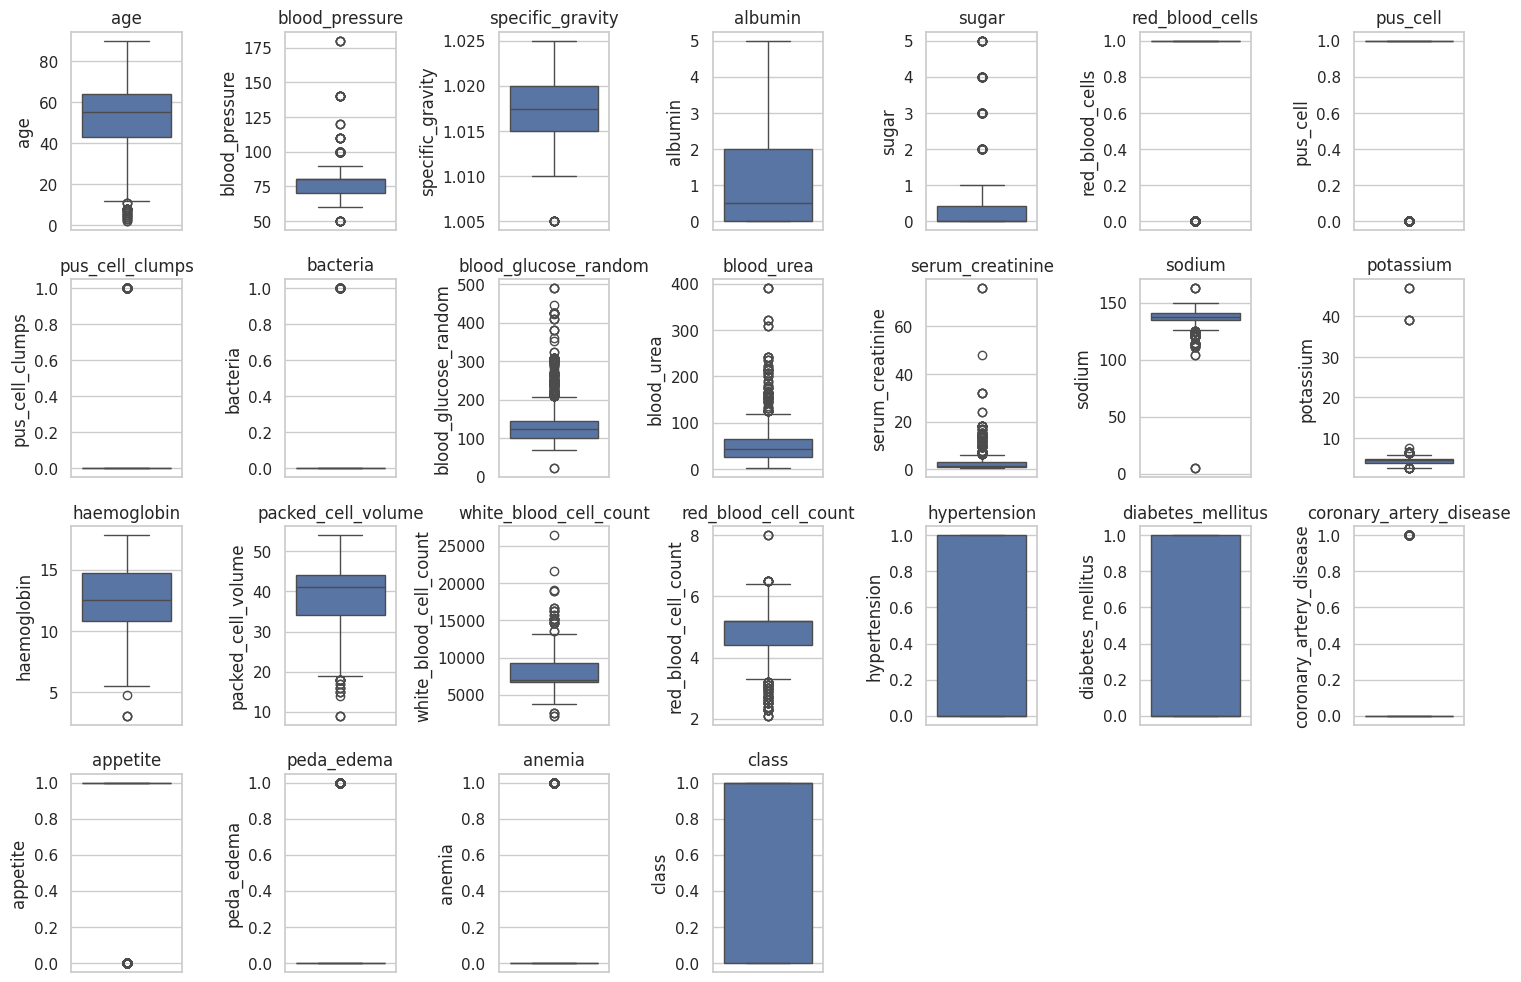

In [348]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 7, i + 1)  # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [349]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to numerical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
new_df_cleaned = new_df.copy() # Create a copy to avoid modifying the original new_df

for col in numerical_cols:
    initial_shape = new_df_cleaned.shape[0]
    new_df_cleaned = remove_outliers_iqr(new_df_cleaned, col)
    rows_removed = initial_shape - new_df_cleaned.shape[0]
    print(f"Removed {rows_removed} outliers from column '{col}'.")

print("\nOutliers removed from numerical columns.")
print("Shape before outlier removal:", new_df.shape)
print("Shape after outlier removal:", new_df_cleaned.shape)

new_df = new_df_cleaned # Update new_df to the cleaned version

Removed 33 outliers from column 'age'.
Removed 90 outliers from column 'blood_pressure'.
Removed 11 outliers from column 'specific_gravity'.
Removed 132 outliers from column 'albumin'.
Removed 189 outliers from column 'sugar'.
Removed 46 outliers from column 'red_blood_cells'.
Removed 43 outliers from column 'pus_cell'.
Removed 9 outliers from column 'pus_cell_clumps'.
Removed 1 outliers from column 'bacteria'.
Removed 21 outliers from column 'blood_glucose_random'.
Removed 23 outliers from column 'blood_urea'.
Removed 65 outliers from column 'serum_creatinine'.
Removed 0 outliers from column 'sodium'.
Removed 0 outliers from column 'potassium'.
Removed 3 outliers from column 'haemoglobin'.
Removed 0 outliers from column 'packed_cell_volume'.
Removed 0 outliers from column 'white_blood_cell_count'.
Removed 2 outliers from column 'red_blood_cell_count'.
Removed 18 outliers from column 'hypertension'.
Removed 12 outliers from column 'diabetes_mellitus'.
Removed 0 outliers from column 'co

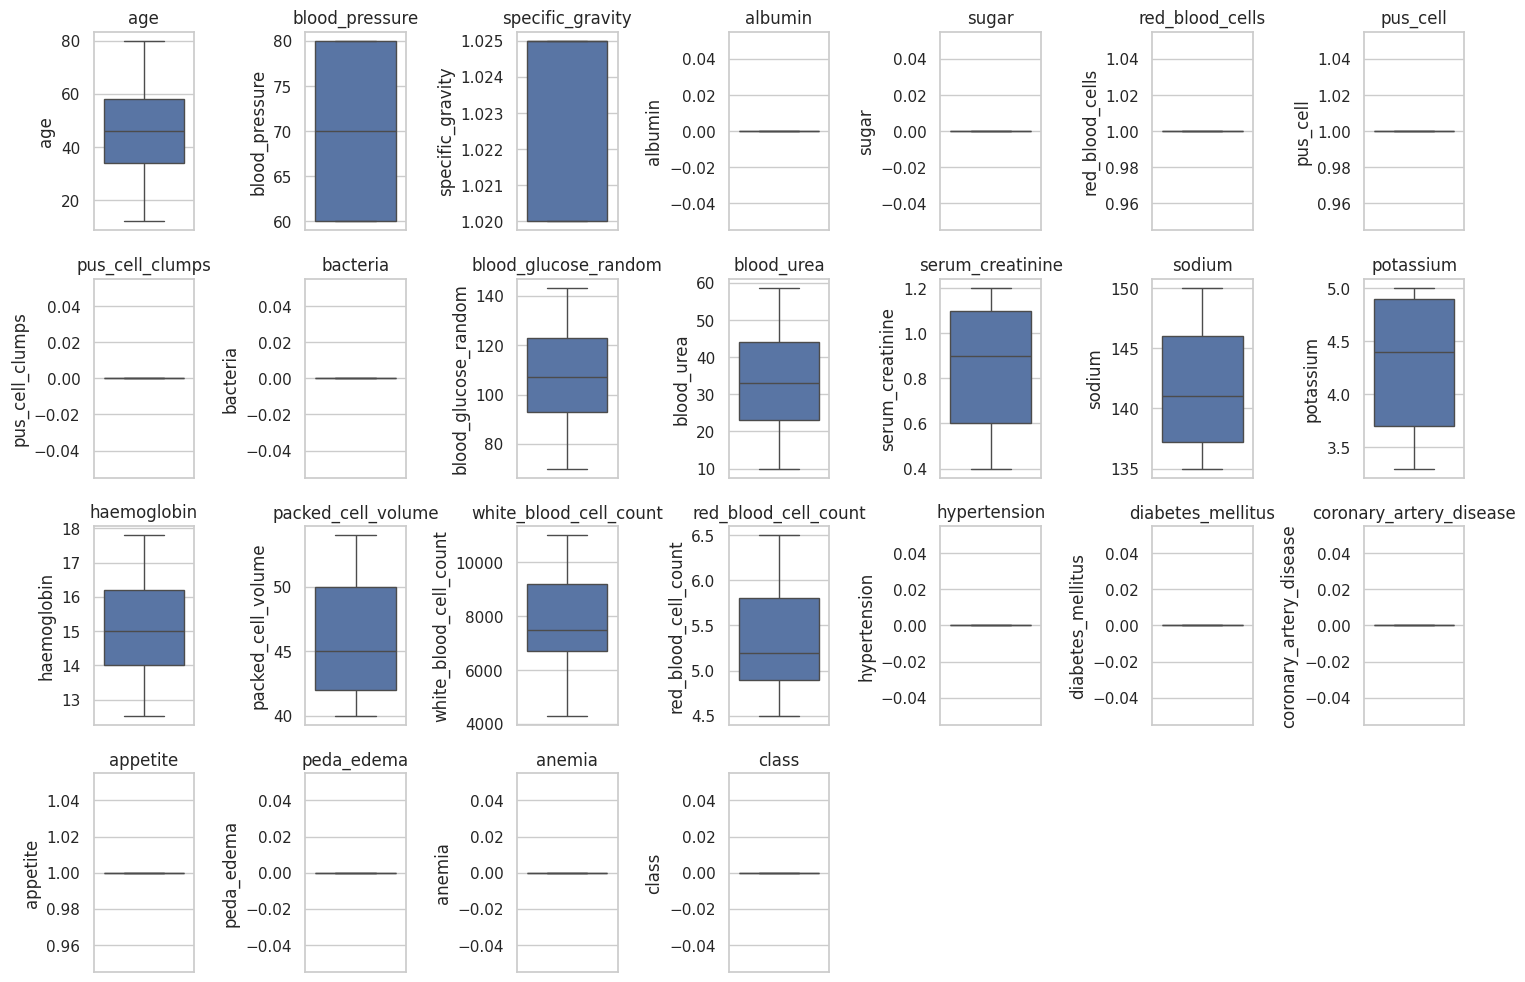

In [350]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 7, i + 1)  # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [351]:

new_df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
count,379.000000,379.000000,379.000000,379.0,379.0,379.0,379.0,379.0,379.0,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.0,379.0,379.0,379.0,379.0,379.0,379.0
mean,46.287599,72.072728,1.022586,0.0,0.0,1.0,1.0,0.0,0.0,107.212536,32.698655,0.870712,141.839355,4.317192,15.118763,46.139842,7765.699208,5.353826,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,16.018149,8.270822,0.002502,0.0,0.0,0.0,0.0,0.0,0.0,19.225524,11.795902,0.260367,4.972560,0.580337,1.362585,4.096581,1716.935631,0.558110,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.000000,60.000000,1.020000,0.0,0.0,1.0,1.0,0.0,0.0,70.000000,10.000000,0.400000,135.000000,3.300000,12.527416,40.000000,4300.000000,4.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,34.000000,60.000000,1.020000,0.0,0.0,1.0,1.0,0.0,0.0,93.000000,23.000000,0.600000,137.235057,3.700000,14.000000,42.000000,6700.000000,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,46.000000,70.000000,1.025000,0.0,0.0,1.0,1.0,0.0,0.0,107.000000,33.000000,0.900000,141.000000,4.400000,15.000000,45.000000,7500.000000,5.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,58.000000,80.000000,1.025000,0.0,0.0,1.0,1.0,0.0,0.0,123.000000,44.000000,1.100000,146.000000,4.900000,16.200000,50.000000,9200.000000,5.800000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,80.000000,80.000000,1.025000,0.0,0.0,1.0,1.0,0.0,0.0,143.183673,58.596765,1.200000,150.000000,5.000000,17.800000,54.000000,11000.000000,6.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


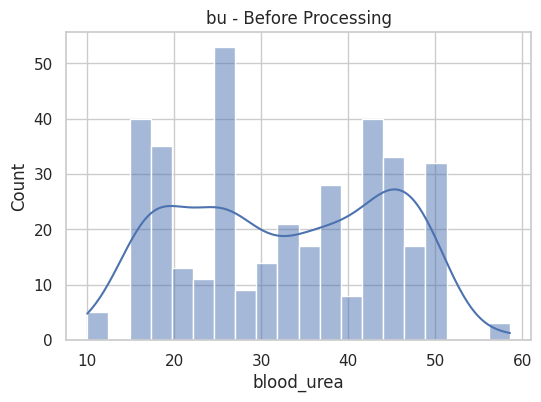

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt


# Before (using the original df dataframe)
plt.figure(figsize=(6,4))
sns.histplot(new_df['blood_urea'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title('bu - Before Processing')
plt.show()

In [353]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = new_df.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

print("Min-Max scaling applied to numerical columns.")
display(new_df.head())

Min-Max scaling applied to numerical columns.


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
1,0.382353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396263,0.185198,0.125,0.800000,0.117647,0.203427,0.285714,0.447761,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.161765,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.560234,0.493860,0.875,0.666667,0.411765,0.336189,0.071429,0.432836,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.455882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.601227,0.452705,0.875,0.000000,0.352941,0.000000,0.142857,0.358209,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.882353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532906,0.329240,0.625,1.000000,0.941176,0.468951,0.857143,0.925373,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.911765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245956,0.823100,0.250,0.800000,0.235294,0.886204,0.928571,0.253731,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


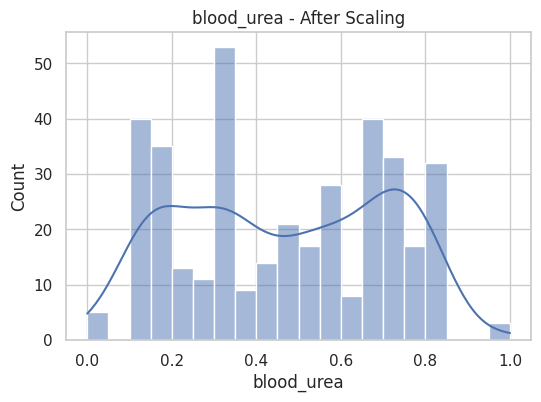

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# After (using the processed new_df with numeric values)
plt.figure(figsize=(6,4))
# Use histplot for numeric data
sns.histplot(new_df['blood_urea'], bins=20, kde=True)
plt.title('blood_urea - After Scaling')
plt.show()

# OTHER

1. Corelatin Heatmap

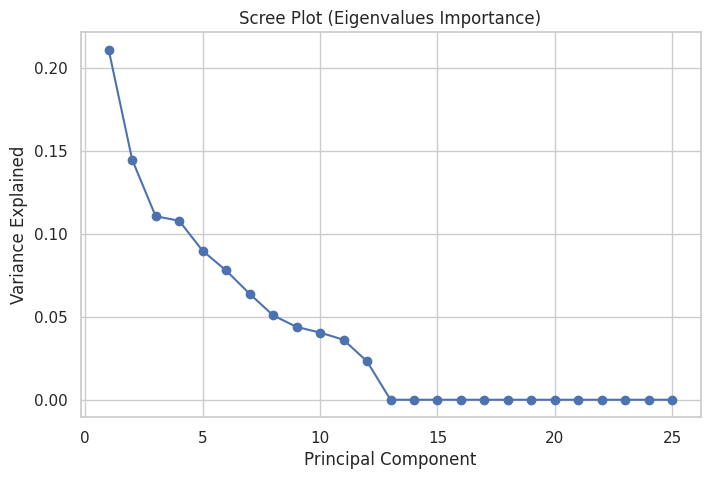

In [356]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(new_df)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (Eigenvalues Importance)")
plt.show()

In [358]:
# Export the current DataFrame to a CSV file
# Specify the desired filename and path
output_path = '/content/drive/MyDrive/V5/CKD_India_processed.csv'

new_df.to_csv(output_path, index=False)

print(f"DataFrame successfully exported to {output_path}")

DataFrame successfully exported to /content/drive/MyDrive/V5/CKD_India_processed.csv
